# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Importing the dataset

In [18]:
df = pd.read_csv("./AIDS_Classification.csv")

# df = df.drop(columns=["Stroke Risk (%)"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

# Cleaning the dataset

In [ ]:
# Data wrangling and cleaning

# --- 1. Remove duplicates ---
df.drop_duplicates(inplace=True)

# --- 2. Standardize column names ---
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# --- 3. Handle missing values ---
# Drop rows where more than 30% of the values are missing
df.dropna(thresh=int(0.7 * len(df.columns)), inplace=True)

# Optional: Preview the cleaned DataFrame
print("✅ Cleaned DataFrame Shape:", df.shape)
print(df.head())

## 1. Dropping uncessary columns

In [3]:
# df = df.drop(columns=["Unnamed: 0"])
# df

## 2. Finding Null values

In [4]:
df.isna().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [5]:
# probs = df['Alcohol_Consumption'].value_counts(normalize=True)
# null_mask = df['Alcohol_Consumption'].isna()
# df.loc[null_mask, 'Alcohol_Consumption'] = np.random.choice(probs.index, size=null_mask.sum(), p=probs.values)

In [6]:
# df['Alcohol_Consumption'].value_counts()

df = df.dropna()

Replaced null values according to their probabilities to avoid bias

# Finding categorial and numerical columns

In [7]:
categorical_column_names = []
numerical_column_names = []
target_column_name = "infected"
for column_name, data_type in df.dtypes.items():
    # check if the datatype is categorial or not
    if isinstance(data_type, np.dtypes.ObjectDType) and column_name is not target_column_name:
        categorical_column_names.append(column_name)
    else:
        if column_name != target_column_name:
            numerical_column_names.append(column_name)

categorical_column_names, numerical_column_names

([],
 ['time',
  'trt',
  'age',
  'wtkg',
  'hemo',
  'homo',
  'drugs',
  'karnof',
  'oprior',
  'z30',
  'preanti',
  'race',
  'gender',
  'str2',
  'strat',
  'symptom',
  'treat',
  'offtrt',
  'cd40',
  'cd420',
  'cd80',
  'cd820'])

# Exploratory Data Analysis (EDA)

In [8]:
# # Sample DataFrame

# # Count 0s and 1s
# counts = df['Previous_Gestational_Diabetes'].value_counts().sort_index()  # Optional: sort_index() puts 0 before 1

# # --- Bar Chart ---
# plt.figure(figsize=(6,4))
# plt.bar(counts.index.astype(str), counts.values)
# plt.title("Count of 0s and 1s in 'status' column")
# plt.xlabel("Diabetes")
# plt.ylabel("Count")
# plt.show()

# # --- Pie Chart (optional) ---
# plt.figure(figsize=(6,6))
# plt.pie(counts.values, labels=['0', '1'], autopct='%1.1f%%', startangle=90)
# plt.title("Distribution of 0s and 1s in 'Diabetes'")
# plt.axis('equal')
# plt.show()

Dataset is balanced to avoid model bias towards a single class

# Data Preprocessing

## Splitting the dataset into independend features and target

In [9]:
X = df.iloc[:, :-1]

y = df.iloc[:, -1]

## Train test split

In [10]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# smote = SMOTE(random_state = 14)

# X_train, y_train = smote.fit_resample(X_train, y_train)


In [11]:
# Define columns
categorical_cols = categorical_column_names
numerical_cols = numerical_column_names

# Create transformers

if len(categorical_column_names) == 0:  
    preprocessor = ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])
else:
    preprocessor = ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])
# Fit on training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

In [12]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.464926,0.433243,-0.697447,1.474676,-0.300838,-1.398247,-0.374041,-0.922598,-0.146603,-1.125267,...,0.459237,-1.204695,-1.105098,-0.444231,0.572176,-0.763409,-0.595483,-0.145292,-0.026340,-0.294955
1,0.750867,-1.348677,-1.269460,-0.304207,3.324048,-1.398247,-0.374041,0.776611,-0.146603,0.888678,...,0.459237,0.830086,0.005191,-0.444231,-1.747713,1.309913,0.105845,0.711481,-0.471168,-0.313603
2,0.359400,-1.348677,-0.011032,-0.050824,-0.300838,-1.398247,2.673503,-0.922598,-0.146603,0.888678,...,0.459237,0.830086,0.005191,-0.444231,-1.747713,1.309913,0.790475,-0.241250,1.522085,0.453299
3,0.727039,0.433243,-0.239837,0.983126,-0.300838,0.715181,-0.374041,-0.922598,-0.146603,-1.125267,...,0.459237,-1.204695,-1.105098,-0.444231,0.572176,-0.763409,-0.553737,-0.590814,-0.892695,-0.789129
4,0.417269,1.324203,-0.583045,-0.084724,-0.300838,0.715181,-0.374041,0.776611,-0.146603,-1.125267,...,0.459237,-1.204695,-1.105098,2.251083,0.572176,-0.763409,-0.637229,-0.467438,-0.835503,-0.602648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,-0.001430,-1.348677,0.103370,3.135777,-0.300838,-1.398247,-0.374041,-0.922598,-0.146603,-1.125267,...,-2.177524,-1.204695,-1.105098,-0.444231,-1.747713,1.309913,-1.271764,-1.132294,0.498981,0.576842
1707,0.607897,-1.348677,1.018590,0.661076,-0.300838,0.715181,-0.374041,0.776611,-0.146603,0.888678,...,0.459237,0.830086,1.115481,-0.444231,-1.747713,-0.763409,0.823872,0.567543,-0.426685,-0.462787
1708,0.073459,-0.457717,-0.583045,-0.789988,-0.300838,0.715181,-0.374041,0.776611,-0.146603,0.888678,...,0.459237,0.830086,0.005191,2.251083,0.572176,-0.763409,-0.011043,-0.542834,-0.337719,-0.332251
1709,-1.900897,-0.457717,-0.125435,-0.508474,-0.300838,0.715181,-0.374041,-0.922598,-0.146603,0.888678,...,0.459237,0.830086,1.115481,-0.444231,0.572176,1.309913,-0.628880,-1.570962,0.649375,0.138613


# Training our model

In [13]:
# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=28)
dt_model.fit(X_train, y_train)

# Predict
dt_preds = dt_model.predict(X_test)

# Evaluation
print("📊 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

📊 Decision Tree Results
Accuracy: 0.8504672897196262
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       327
           1       0.69      0.67      0.68       101

    accuracy                           0.85       428
   macro avg       0.79      0.79      0.79       428
weighted avg       0.85      0.85      0.85       428



📊 Logistic Regression Results
Accuracy: 0.8598130841121495
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       327
           1       0.78      0.56      0.66       101

    accuracy                           0.86       428
   macro avg       0.83      0.76      0.78       428
weighted avg       0.85      0.86      0.85       428



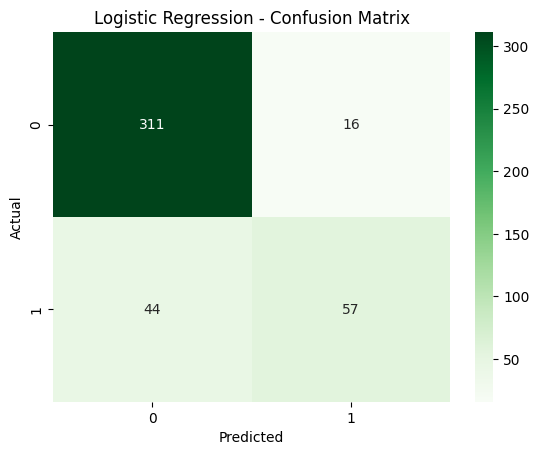

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
lr_model = LogisticRegression(max_iter=10000)  # increase max_iter if convergence warnings
lr_model.fit(X_train, y_train)

# Predict
lr_preds = lr_model.predict(X_test)

# Evaluate
print("📊 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


📊 Neural Network (MLP) Results
Accuracy: 0.8621495327102804
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       327
           1       0.74      0.64      0.69       101

    accuracy                           0.86       428
   macro avg       0.82      0.79      0.80       428
weighted avg       0.86      0.86      0.86       428



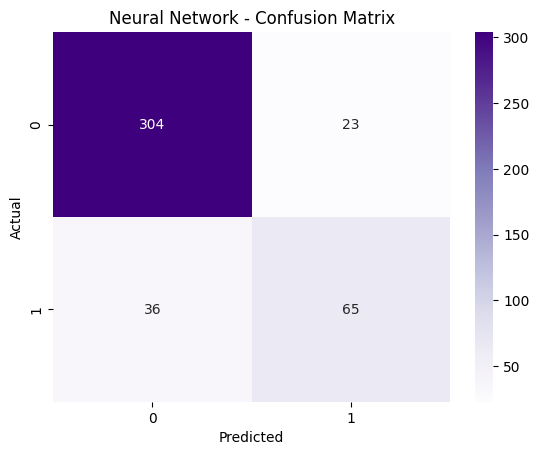

In [15]:
from sklearn.neural_network import MLPClassifier

# Create and train the model
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

# Predict
nn_preds = nn_model.predict(X_test)

# Evaluate
print("📊 Neural Network (MLP) Results")
print("Accuracy:", accuracy_score(y_test, nn_preds))
print(classification_report(y_test, nn_preds))

# Confusion matrix
cm_nn = confusion_matrix(y_test, nn_preds)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples')
plt.title("Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


d:\disha-ml-project\disha-ml-project-venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:38:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 XGBoost Classifier Results
Accuracy: 0.8901869158878505
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       327
           1       0.79      0.73      0.76       101

    accuracy                           0.89       428
   macro avg       0.85      0.84      0.84       428
weighted avg       0.89      0.89      0.89       428



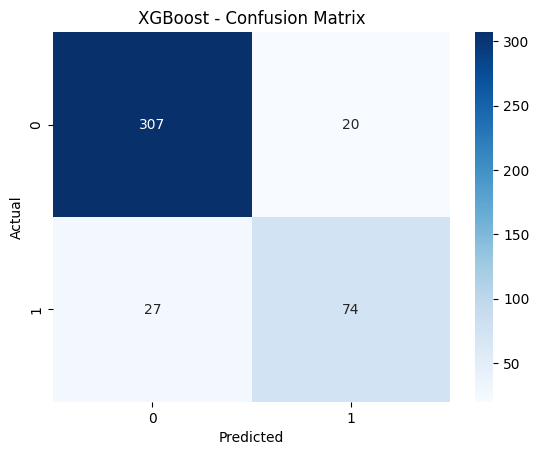

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test)

# Evaluate
print("📊 XGBoost Classifier Results")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, xgb_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


📊 Random Forest Classifier Results
Accuracy: 0.8948598130841121
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       327
           1       0.85      0.67      0.75       101

    accuracy                           0.89       428
   macro avg       0.88      0.82      0.84       428
weighted avg       0.89      0.89      0.89       428



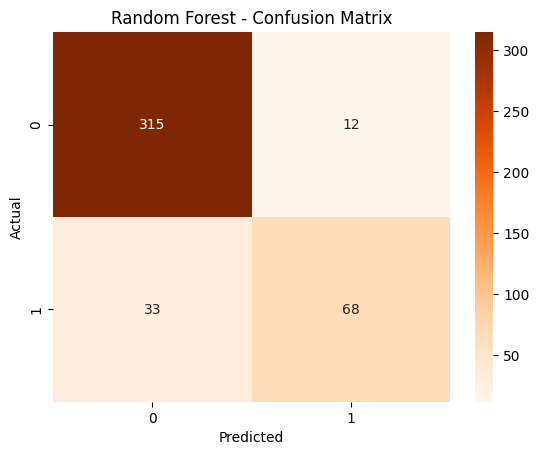

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluate
print("📊 Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
